In [1]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot,plot_plotly,plot_components_plotly

In [2]:
df=pd.read_csv(r"C:\Users\ADMIN\Desktop\2001-2020_SATARA_PPT.csv")

In [10]:
df1=df.dropna()

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8036 entries, 0 to 8035
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      8036 non-null   datetime64[ns]
 1   y       8036 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 188.3 KB


In [12]:
df1.columns=['ds','y']

In [13]:
df1['ds']=pd.to_datetime(df1['ds'])

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_6064/1051135127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ds']=pd.to_datetime(df1['ds'])


In [14]:
df1.tail()

,ds,y
8031,2021-12-27,0.0
8032,2021-12-28,0.0
8033,2021-12-29,0.0
8034,2021-12-30,0.0
8035,2021-12-31,0.0


<AxesSubplot:xlabel='ds'>

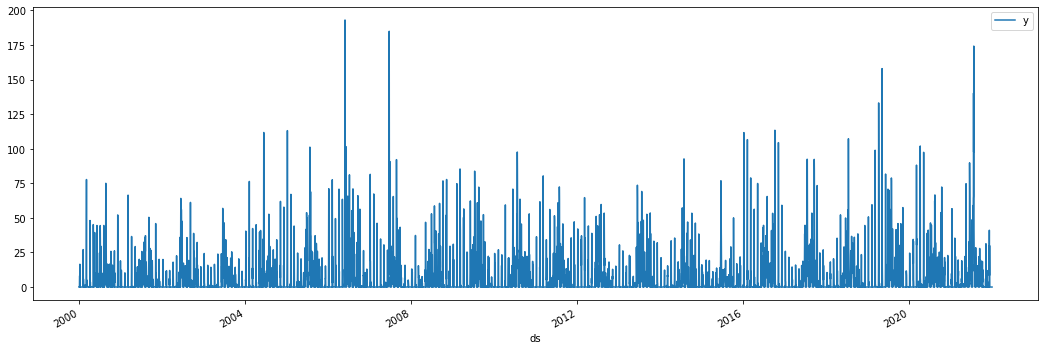

In [15]:
df1.plot(x='ds',y='y',figsize=(18,6))

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

D:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:>

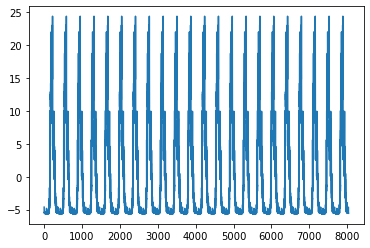

In [18]:
result=seasonal_decompose(df1['y'], model='additionable', period=365)
result.seasonal.plot()

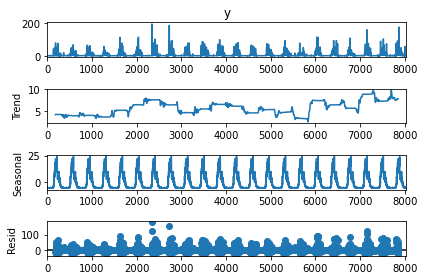

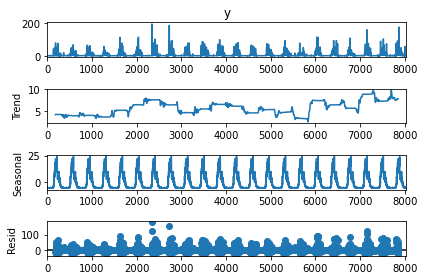

In [19]:
result.plot()

In [26]:
train=df.iloc[:len(df1)-365]
test=df.iloc[len(df1)-365:]

In [43]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12 *10, freq='M')
forecast=m.predict(future)

14:13:07 - cmdstanpy - INFO - Chain [1] start processing
14:13:07 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
7786,2030-08-31,13.704664,1.769929,34.426910,11.354059,16.247044,4.874104,4.874104,4.874104,0.077794,0.077794,0.077794,4.796310,4.796310,4.796310,0.0,0.0,0.0,18.578768
7787,2030-09-30,13.751693,0.148676,31.228561,11.398661,16.330291,1.553714,1.553714,1.553714,-0.230186,-0.230186,-0.230186,1.783900,1.783900,1.783900,0.0,0.0,0.0,15.305407
7788,2030-10-31,13.800290,-5.438898,26.180750,11.427191,16.409850,-3.379447,-3.379447,-3.379447,-0.042171,-0.042171,-0.042171,-3.337276,-3.337276,-3.337276,0.0,0.0,0.0,10.420843
7789,2030-11-30,13.847319,-6.856041,25.029198,11.423820,16.477363,-4.848015,-4.848015,-4.848015,0.077794,0.077794,0.077794,-4.925809,-4.925809,-4.925809,0.0,0.0,0.0,8.999304
7790,2030-12-31,13.895916,-5.583940,26.159622,11.422365,16.562354,-3.641594,-3.641594,-3.641594,0.172340,0.172340,0.172340,-3.813934,-3.813934,-3.813934,0.0,0.0,0.0,10.254322


In [45]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7786,2030-08-31,18.578768,1.769929,34.426910
7787,2030-09-30,15.305407,0.148676,31.228561
7788,2030-10-31,10.420843,-5.438898,26.180750
7789,2030-11-30,8.999304,-6.856041,25.029198
7790,2030-12-31,10.254322,-5.583940,26.159622


In [46]:
plot_plotly(m,forecast)

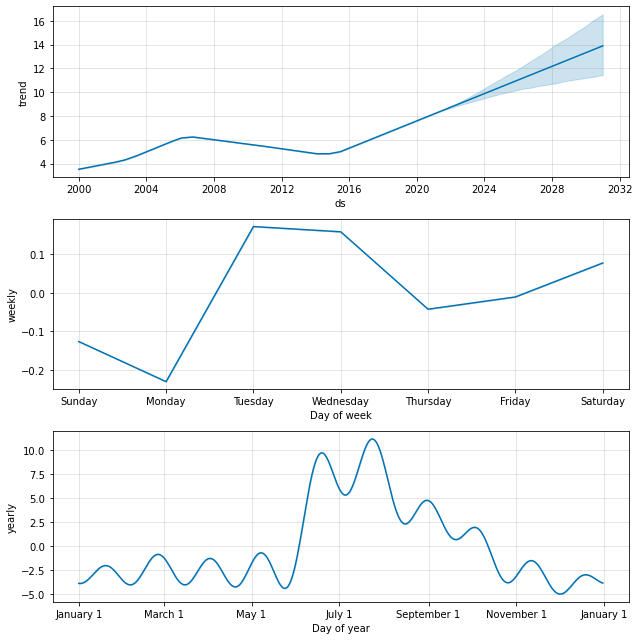

In [47]:
fig2 = m.plot_components(forecast)